In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore') 

In [2]:
# importing the train dataset
train = pd.read_csv(r'C:\Users\piush\Desktop\Dataset\DigitRecognizer\train.csv')
train.head(10)

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   
5      0       0       0       0       0       0       0       0       0   
6      7       0       0       0       0       0       0       0       0   
7      3       0       0       0       0       0       0       0       0   
8      5       0       0       0       0       0       0       0       0   
9      3       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   
5       0    ...            0         0         0         0         0   
6       0    ...            0         0         0         0         0   
7       0    ...            0         0         0         0         0   
8       0    ...            0         0         0         0         0   
9       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         0  
1         0         0         0         0         0  
2         0         0         0         0         0  
3         0         0         0         0         0  
4         0         0         0         0         0  
5         0         0         0         0         0  
6         0         0         0         0         0  
7         0         0         0         0         0  
8         0         0         0         0         0  
9         0         0         0         0         0  

[10 rows x 785 columns]

In [3]:
# importing the train dataset
test = pd.read_csv(r'C:\Users\piush\Desktop\Dataset\DigitRecognizer\test.csv')
test.head(3)

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   

   pixel9    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         0  
1         0         0         0         0         0  
2         0         0         0         0         0  

[3 rows x 784 columns]

In [4]:
print('Reading train data')
print('\nSize of training data: ' + str(train.shape))
print('Columns:' + str(train.columns.values))

print('dtypes')
print('\n')
print(train.dtypes)
print('\n')
print('Info: ')
print('\n')
print(train.info)
print('Shape: ')
print('\n')
print(train.shape)
print('\n')
print('numerical columns statistcs')
print('\n')
print(train.describe())

Reading train data

Size of training data: (42000, 785)
Columns:['label' 'pixel0' 'pixel1' 'pixel2' 'pixel3' 'pixel4' 'pixel5' 'pixel6'
 'pixel7' 'pixel8' 'pixel9' 'pixel10' 'pixel11' 'pixel12' 'pixel13'
 'pixel14' 'pixel15' 'pixel16' 'pixel17' 'pixel18' 'pixel19' 'pixel20'
 'pixel21' 'pixel22' 'pixel23' 'pixel24' 'pixel25' 'pixel26' 'pixel27'
 'pixel28' 'pixel29' 'pixel30' 'pixel31' 'pixel32' 'pixel33' 'pixel34'
 'pixel35' 'pixel36' 'pixel37' 'pixel38' 'pixel39' 'pixel40' 'pixel41'
 'pixel42' 'pixel43' 'pixel44' 'pixel45' 'pixel46' 'pixel47' 'pixel48'
 'pixel49' 'pixel50' 'pixel51' 'pixel52' 'pixel53' 'pixel54' 'pixel55'
 'pixel56' 'pixel57' 'pixel58' 'pixel59' 'pixel60' 'pixel61' 'pixel62'
 'pixel63' 'pixel64' 'pixel65' 'pixel66' 'pixel67' 'pixel68' 'pixel69'
 'pixel70' 'pixel71' 'pixel72' 'pixel73' 'pixel74' 'pixel75' 'pixel76'
 'pixel77' 'pixel78' 'pixel79' 'pixel80' 'pixel81' 'pixel82' 'pixel83'
 'pixel84' 'pixel85' 'pixel86' 'pixel87' 'pixel88' 'pixel89' 'pixel90'
 'pixel91' 'pix

### So there are 785 columns with the first column as label. It is multi class classification problem.

Also all the datarows are in numerical.

In [5]:
import re
# Review input features (train set) - Part 2A
missing_values = []
nonumeric_values = []

print ("TRAINING SET INFORMATION")
print ("========================\n")

for column in train:
    # Find all the unique feature values
    uniq = train[column].unique()
    print ("'{}' has {} unique values" .format(column,uniq.size))
    
    
    # Find features with missing values
    if (True in pd.isnull(uniq)):
        s = "{} has {} missing" .format(column, pd.isnull(train[column]).sum())
        missing_values.append(s)
    
    # Find features with non-numeric values
    for i in range (1, np.prod(uniq.shape)):
        if (re.match('nan', str(uniq[i]))):
            break
        if not (re.search('(^\d+\.?\d*$)|(^\d*\.?\d+$)', str(uniq[i]))):
            nonumeric_values.append(column)
            break
  
print ("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
print ("Features with missing values:\n{}\n\n" .format(missing_values))
print ("Features with non-numeric values:\n{}" .format(nonumeric_values))
print ("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")

TRAINING SET INFORMATION

'label' has 10 unique values
'pixel0' has 1 unique values
'pixel1' has 1 unique values
'pixel2' has 1 unique values
'pixel3' has 1 unique values
'pixel4' has 1 unique values
'pixel5' has 1 unique values
'pixel6' has 1 unique values
'pixel7' has 1 unique values
'pixel8' has 1 unique values
'pixel9' has 1 unique values
'pixel10' has 1 unique values
'pixel11' has 1 unique values
'pixel12' has 3 unique values
'pixel13' has 3 unique values
'pixel14' has 2 unique values
'pixel15' has 2 unique values
'pixel16' has 1 unique values
'pixel17' has 1 unique values
'pixel18' has 1 unique values
'pixel19' has 1 unique values
'pixel20' has 1 unique values
'pixel21' has 1 unique values
'pixel22' has 1 unique values
'pixel23' has 1 unique values
'pixel24' has 1 unique values
'pixel25' has 1 unique values
'pixel26' has 1 unique values
'pixel27' has 1 unique values
'pixel28' has 1 unique values
'pixel29' has 1 unique values
'pixel30' has 1 unique values
'pixel31' has 1 unique va

There are no missing and non-numeric values

## Feature Selection

##### As there are 785 features, let us select some important features.

In [23]:
data_cl = train.copy() # create a copy of data frame

target = data_cl['label'].copy()
data_cl.drop('label', axis=1, inplace=True)


pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         0  
1         0         0         0         0         0  
2         0         0         0         0         0  
3         0         0         0         0         0  
4         0         0         0         0         0  

[5 rows x 784 columns]

In [59]:
# Separate dataset for validation
unknown_mask = train['label'].isnull()
#data_submit = data_cl[unknown_mask]

# Separate dataset for training
X = data_cl[~unknown_mask]
Y = target[~unknown_mask]

In [37]:
from sklearn.feature_selection import VarianceThreshold, RFE, SelectKBest, chi2

## Variance Threshold

In [38]:
#Find all features with more than 90% variance in values.
threshold = 0.90
vt = VarianceThreshold().fit(X)

# Find feature names
feat_var_threshold = data_cl.columns[vt.variances_ > threshold * (1-threshold)]
feat_var_threshold


Index(['pixel100', 'pixel101', 'pixel102', 'pixel103', 'pixel104', 'pixel105',
       'pixel106', 'pixel107', 'pixel108', 'pixel109',
       ...
       'pixel90', 'pixel91', 'pixel92', 'pixel93', 'pixel94', 'pixel95',
       'pixel96', 'pixel97', 'pixel98', 'pixel99'],
      dtype='object', length=689)

# Top 20 most important features

### According to RandomForestClassifier

In [39]:
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier, RandomForestClassifier, AdaBoostClassifier


In [40]:
model = RandomForestClassifier()
model.fit(X, Y)

feature_imp = pd.DataFrame(model.feature_importances_, index=X.columns, columns=["importance"])
feat_imp_20 = feature_imp.sort_values("importance", ascending=False).head(20).index
feat_imp_20

Index(['pixel405', 'pixel461', 'pixel346', 'pixel430', 'pixel350', 'pixel657',
       'pixel318', 'pixel437', 'pixel183', 'pixel489', 'pixel409', 'pixel569',
       'pixel515', 'pixel431', 'pixel152', 'pixel408', 'pixel349', 'pixel433',
       'pixel211', 'pixel541'],
      dtype='object')

## Univariate feature selection

### Select top 20 features using chi2chi2 test. 

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
X_minmax = MinMaxScaler(feature_range=(0,1)).fit_transform(X)
X_scored = SelectKBest(score_func=chi2, k='all').fit(X_minmax, Y)
feature_scoring = pd.DataFrame({
        'feature': X.columns,
        'score': X_scored.scores_
    })

feat_scored_20 = feature_scoring.sort_values('score', ascending=False).head(20)['feature'].values
feat_scored_20

array(['pixel386', 'pixel358', 'pixel414', 'pixel350', 'pixel539',
       'pixel413', 'pixel511', 'pixel330', 'pixel567', 'pixel385',
       'pixel568', 'pixel427', 'pixel455', 'pixel514', 'pixel483',
       'pixel542', 'pixel540', 'pixel596', 'pixel428', 'pixel510'], dtype=object)

## Final feature selection

###### Finally features selected by all methods will be merged together

In [43]:
features = np.hstack([
        feat_var_threshold, 
        feat_imp_20,
        feat_scored_20,
        ])

features = np.unique(features)
print('Final features set:\n')
for f in features:
    print("\t-{}".format(f))

Final features set:

	-pixel100
	-pixel101
	-pixel102
	-pixel103
	-pixel104
	-pixel105
	-pixel106
	-pixel107
	-pixel108
	-pixel109
	-pixel110
	-pixel114
	-pixel115
	-pixel116
	-pixel117
	-pixel118
	-pixel119
	-pixel12
	-pixel120
	-pixel121
	-pixel122
	-pixel123
	-pixel124
	-pixel125
	-pixel126
	-pixel127
	-pixel128
	-pixel129
	-pixel13
	-pixel130
	-pixel131
	-pixel132
	-pixel133
	-pixel134
	-pixel135
	-pixel136
	-pixel137
	-pixel138
	-pixel14
	-pixel142
	-pixel143
	-pixel144
	-pixel145
	-pixel146
	-pixel147
	-pixel148
	-pixel149
	-pixel150
	-pixel151
	-pixel152
	-pixel153
	-pixel154
	-pixel155
	-pixel156
	-pixel157
	-pixel158
	-pixel159
	-pixel160
	-pixel161
	-pixel162
	-pixel163
	-pixel164
	-pixel165
	-pixel166
	-pixel170
	-pixel171
	-pixel172
	-pixel173
	-pixel174
	-pixel175
	-pixel176
	-pixel177
	-pixel178
	-pixel179
	-pixel180
	-pixel181
	-pixel182
	-pixel183
	-pixel184
	-pixel185
	-pixel186
	-pixel187
	-pixel188
	-pixel189
	-pixel190
	-pixel191
	-pixel192
	-pixel193
	-pixel194
	-p

## Prepare dataset for further analysis 

In [60]:
data_cl = data_cl.ix[:, features]
data_submit = test.ix[:, features]
X = X.ix[:, features]

print('Clean dataset shape: {}'.format(data_cl.shape))
print('Submitable dataset shape: {}'.format(data_submit.shape))
print('Train features shape: {}'.format(X.shape))
print('Target label shape: {}'. format(Y.shape))

Clean dataset shape: (42000, 689)
Submitable dataset shape: (28000, 689)
Train features shape: (42000, 689)
Target label shape: (42000,)


## PCA Visualization

In [47]:
from sklearn.decomposition import PCA, KernelPCA

In [48]:
components = 8
pca = PCA(n_components=components).fit(X)

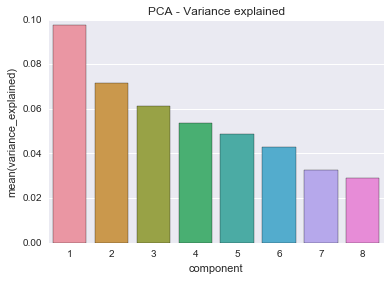

In [49]:
#Show explained variance for each component
pca_variance_explained_df = pd.DataFrame({
    "component": np.arange(1, components+1),
    "variance_explained": pca.explained_variance_ratio_            
    })

ax = sns.barplot(x='component', y='variance_explained', data=pca_variance_explained_df)
ax.set_title("PCA - Variance explained")
plt.show()

## Evaluate Algorithms

In [50]:
from sklearn.cross_validation import KFold, cross_val_score
seed = 7
processors=1
num_folds=3
num_instances=len(X)
scoring='log_loss'

kfold = KFold(n=num_instances, n_folds=num_folds, random_state=seed)

### Algorithms spot-check

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


In [52]:
# Prepare some basic models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('K-NN', KNeighborsClassifier(n_neighbors=5)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

# Evaluate each model in turn
results = []
names = []

for name, model in models:
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring, n_jobs=processors)
    results.append(cv_results)
    names.append(name)
    print("{0}: ({1:.3f}) +/- ({2:.3f})".format(name, cv_results.mean(), cv_results.std()))

LR: (-0.548) +/- (0.032)
LDA: (-0.635) +/- (0.017)
K-NN: (-0.396) +/- (0.031)
CART: (-5.281) +/- (0.014)
NB: (-14.664) +/- (0.364)


#### KNeighborsClassifier and DecisionTreeClassifier have the least log-loss , followed by Logistic Regression

### Ensembles

#### Bagged Decision Trees

In [53]:
cart = DecisionTreeClassifier()
num_trees = 100

model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)

results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring, n_jobs=processors)
print("({0:.3f}) +/- ({1:.3f})".format(results.mean(), results.std()))

(-0.279) +/- (0.011)


#### AdaBoost

In [54]:
model = AdaBoostClassifier(n_estimators=100, random_state=seed)

results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring, n_jobs=processors)
print("({0:.3f}) +/- ({1:.3f})".format(results.mean(), results.std()))


(-2.123) +/- (0.002)


#### Stochastic Gradient Boosting

In [55]:
model = GradientBoostingClassifier(n_estimators=100, random_state=seed)

results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring, n_jobs=processors)
print("({0:.3f}) +/- ({1:.3f})".format(results.mean(), results.std()))

(-0.209) +/- (0.003)


#### Random Forest Classifier

In [56]:
num_trees = 100
num_features = 10

model = RandomForestClassifier(n_estimators=num_trees, max_features=num_features)

results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring, n_jobs=processors)
print("({0:.3f}) +/- ({1:.3f})".format(results.mean(), results.std()))

(-0.353) +/- (0.005)


Therefore the algorithms which perform better are:
>Stochastic Gradient Boosting

>AdaBoost

>LogisticRegression

>KNeighborsClassifier

>RandomForestClassifier

Let us create a sub model.

    

In [64]:
#Voting Ensemble
# Create sub models
estimators = []


estimators.append(('lr', LogisticRegression(penalty='l2', C=1)))
estimators.append(('knn', KNeighborsClassifier(n_neighbors=5)))
estimators.append(('gbm', GradientBoostingClassifier(n_estimators=200, max_depth=3, learning_rate=0.1, max_features=15, warm_start=True, random_state=seed)))
estimators.append(('rf', RandomForestClassifier(bootstrap=True, max_depth=8, n_estimators=200, max_features=20, criterion='entropy', random_state=seed)))
estimators.append(('ada', AdaBoostClassifier(algorithm='SAMME.R', learning_rate=1e-2, n_estimators=10, random_state=seed)))

# create the ensemble model
ensemble = VotingClassifier(estimators, voting='soft', weights=[3,2,3,3,1])

results = cross_val_score(ensemble, X, Y, cv=kfold, scoring=scoring,n_jobs=processors)
print("({0:.3f}) +/- ({1:.3f})".format(results.mean(), results.std()))

(-0.330) +/- (0.001)


In [67]:
model = ensemble

model.fit(X, Y)
preds = model.predict_proba(data_submit)

submission = pd.DataFrame()
submission["ImageId"] = data_submit.index
submission["Label"]= preds[:,0]

submission.to_csv("sub.csv",index=False)